In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

#from scipy.stats import logistic, norm
#from scipy.stats import multivariate_normal as Gaussian

from numpy.random import multivariate_normal as Gaussian
from numpy.random import normal as norm

import time

In [2]:
'''
This file contains sample code about how to use Gauss–Hermite quadrature to compute a 
specific type of integral numerically.

The general form of this type of integral is:( see https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature 
for more details)

F = int_{ -inf}^{+inf} e^{-x*x) f(x) dx,  (1)

in which we're calculating the integral of f(x) in the range ( -inf, +inf) weighted by e^(-x*x ).
Note that for f(x) being polynomial function, this integral is guaranteed to converge. But for some others 
convergence is not guaranteed.
'''

def gass_hermite_quad(f, degree):
    '''
    Calculate the integral (1) numerically.
    :param f: target function, takes a array as input x = [x0, x1,...,xn], and return a array of function 
    values f(x) = [f(x0),f(x1), ..., f(xn)]
    :param degree: integer, >=1, number of points
    :return:
    '''

    points, weights = np.polynomial.hermite.hermgauss(degree)

    #function values at given points
    f_x = f(points)

    #weighted sum of function values
    F = np.sum(f_x  * weights)

    return F

In [3]:
sigma_ = lambda x: 1/np.sqrt(alpha)*logistic.cdf(a*x/np.sqrt(alpha)+b)

In [4]:
alpha = 1
a = 10 
b = 3

In [5]:
def sigma(y):
    O = np.zeros(y.shape)
    x = a*y+b
    I = (x>=0)
    J = (x<0)
    O[I] = 1/(1+np.exp(-x[I]))
    O[J] = np.exp(x[J])/(1+np.exp(x[J]))
    return O

In [6]:
sigma(np.array([-9, 3, 6]))

array([1.64581143e-38, 1.00000000e+00, 1.00000000e+00])

In [7]:
G = gass_hermite_quad(sigma_, degree=300)
G

1.1689795217645669

In [8]:
lp = lambda x: -alpha*x*x + np.log(sigma(x))

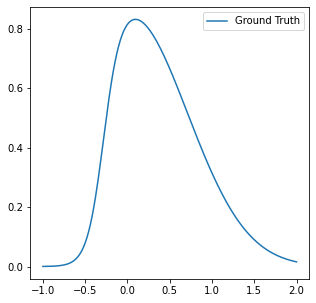

In [9]:
X = np.linspace(-1, 2, 300)
plt.figure(figsize=(5, 5))
plt.plot(X, 1/G *np.exp(lp(X)), label = 'Ground Truth')
plt.legend()
plt.show()

In [10]:
sigma(np.array([-9,-9]))

array([1.64581143e-38, 1.64581143e-38])

### (a) MCMC

In [11]:
d = 1

In [12]:
def log_gaussian(z, mu, C):
    return -0.5 * (z - mu) @ C @ (z - mu)

In [13]:
def TK(z, C):
    z_new = Gaussian(mean = z, cov = C)
    log_acc = lp(z_new) - lp(z)
    log_p = np.log(np.random.uniform())
    if log_p <= log_acc:
        return z_new
    else:
        return None

In [14]:
def _rvs_(tau = 0.01, n_sample = 50000, burn_in_after = 10**5, pick_every = 10):
    c = 1
    sampled = 0
    z_given = np.zeros(1)
    Sample_points = []
    iteration = 0
    while sampled < n_sample:
        if iteration % 10000 == 0:
            print('iteration = {}, number of accepted points = {}'.format(iteration,c))
        iteration += 1
        z_ = TK(z_given, tau*np.eye(d))
        if z_ is not None:
            c += 1
            z_given = z_
            if c == burn_in_after:
                print('burn_in!!')
            if c >= burn_in_after:
                if sampled % pick_every == 0:
                    Sample_points.append(z_given)
                sampled += 1
    return np.array(Sample_points), c/iteration

In [15]:
t = time.time()
S, p = _rvs_()
print(time.time()-t)

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 9360
iteration = 20000, number of accepted points = 18710
iteration = 30000, number of accepted points = 28066
iteration = 40000, number of accepted points = 37396
iteration = 50000, number of accepted points = 46718
iteration = 60000, number of accepted points = 56074
iteration = 70000, number of accepted points = 65419
iteration = 80000, number of accepted points = 74707
iteration = 90000, number of accepted points = 84070
iteration = 100000, number of accepted points = 93370
burn_in!!
iteration = 110000, number of accepted points = 102696
iteration = 120000, number of accepted points = 111936
iteration = 130000, number of accepted points = 121262
iteration = 140000, number of accepted points = 130528
iteration = 150000, number of accepted points = 139848
iteration = 160000, number of accepted points = 149172
13.889656782150269


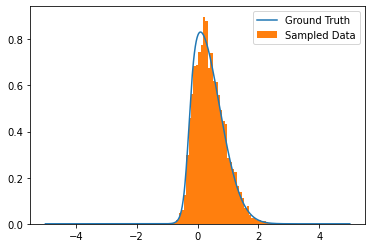

In [16]:
#plt.figure(figsize=(10,10))
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/G *np.exp(lp(x)), label = 'Ground Truth')
plt.hist(S, bins=50, density=True, label = "Sampled Data")
plt.legend()
plt.show()

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 9367
iteration = 20000, number of accepted points = 18696
iteration = 30000, number of accepted points = 28090
iteration = 40000, number of accepted points = 37490
iteration = 50000, number of accepted points = 46877
iteration = 60000, number of accepted points = 56212
iteration = 70000, number of accepted points = 65528
iteration = 80000, number of accepted points = 74875
iteration = 90000, number of accepted points = 84247
iteration = 100000, number of accepted points = 93598
burn_in!!
iteration = 110000, number of accepted points = 102944
iteration = 120000, number of accepted points = 112273
iteration = 130000, number of accepted points = 121546
iteration = 140000, number of accepted points = 130906
iteration = 150000, number of accepted points = 140236
iteration = 160000, number of accepted points = 149599
For tau = 0.01, the tunning time is 14.098562955856323 


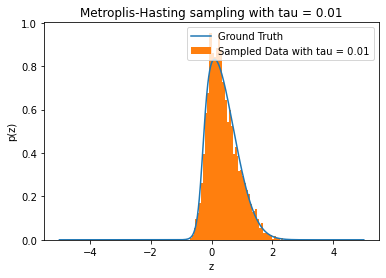

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 7936
iteration = 20000, number of accepted points = 15916
iteration = 30000, number of accepted points = 23861
iteration = 40000, number of accepted points = 31800
iteration = 50000, number of accepted points = 39758
iteration = 60000, number of accepted points = 47691
iteration = 70000, number of accepted points = 55626
iteration = 80000, number of accepted points = 63535
iteration = 90000, number of accepted points = 71489
iteration = 100000, number of accepted points = 79493
iteration = 110000, number of accepted points = 87423
iteration = 120000, number of accepted points = 95458
burn_in!!
iteration = 130000, number of accepted points = 103435
iteration = 140000, number of accepted points = 111341
iteration = 150000, number of accepted points = 119351
iteration = 160000, number of accepted points = 127377
iteration = 170000, number of accepted points = 135390
iteration = 180000, number of ac

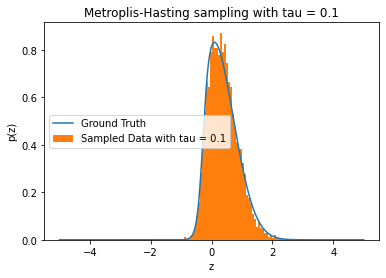

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 7203
iteration = 20000, number of accepted points = 14312
iteration = 30000, number of accepted points = 21522
iteration = 40000, number of accepted points = 28691
iteration = 50000, number of accepted points = 35872
iteration = 60000, number of accepted points = 43074
iteration = 70000, number of accepted points = 50246
iteration = 80000, number of accepted points = 57507
iteration = 90000, number of accepted points = 64752
iteration = 100000, number of accepted points = 71897
iteration = 110000, number of accepted points = 79084
iteration = 120000, number of accepted points = 86226
iteration = 130000, number of accepted points = 93413
burn_in!!
iteration = 140000, number of accepted points = 100631
iteration = 150000, number of accepted points = 107831
iteration = 160000, number of accepted points = 115063
iteration = 170000, number of accepted points = 122262
iteration = 180000, number of acc

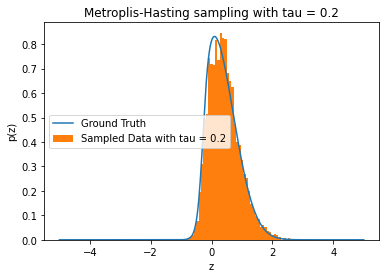

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 5967
iteration = 20000, number of accepted points = 12025
iteration = 30000, number of accepted points = 17867
iteration = 40000, number of accepted points = 23773
iteration = 50000, number of accepted points = 29730
iteration = 60000, number of accepted points = 35706
iteration = 70000, number of accepted points = 41620
iteration = 80000, number of accepted points = 47601
iteration = 90000, number of accepted points = 53556
iteration = 100000, number of accepted points = 59429
iteration = 110000, number of accepted points = 65333
iteration = 120000, number of accepted points = 71279
iteration = 130000, number of accepted points = 77238
iteration = 140000, number of accepted points = 83245
iteration = 150000, number of accepted points = 89122
iteration = 160000, number of accepted points = 95035
burn_in!!
iteration = 170000, number of accepted points = 100961
iteration = 180000, number of accept

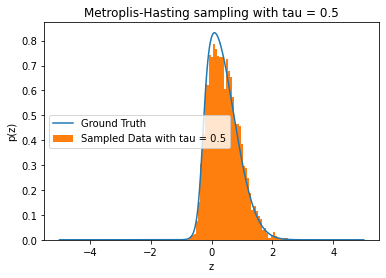

iteration = 0, number of accepted points = 1
iteration = 10000, number of accepted points = 4883
iteration = 20000, number of accepted points = 9781
iteration = 30000, number of accepted points = 14630
iteration = 40000, number of accepted points = 19460
iteration = 50000, number of accepted points = 24330
iteration = 60000, number of accepted points = 29187
iteration = 70000, number of accepted points = 34060
iteration = 80000, number of accepted points = 38892
iteration = 90000, number of accepted points = 43723
iteration = 100000, number of accepted points = 48619
iteration = 110000, number of accepted points = 53446
iteration = 120000, number of accepted points = 58324
iteration = 130000, number of accepted points = 63185
iteration = 140000, number of accepted points = 68153
iteration = 150000, number of accepted points = 72967
iteration = 160000, number of accepted points = 77822
iteration = 170000, number of accepted points = 82556
iteration = 180000, number of accepted points = 

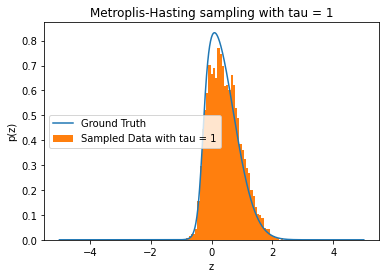

In [17]:
rate = []
x = np.linspace(-5, 5, 1000)
y = 1/G *np.exp(lp(x))
for tau in [0.01, 0.1, 0.2, 0.5, 1]:
    t = time.time()
    S, p = _rvs_(tau = tau)
    print('For tau = {}, the tunning time is {} '.format(tau, time.time()-t))
    rate.append(p)
    plt.plot(x, y, label = 'Ground Truth')
    plt.hist(S, bins=50, density=True, label = "Sampled Data with tau = {}".format(tau))
    plt.title('Metroplis-Hasting sampling with tau = {}'.format(tau))
    plt.xlabel("z")
    plt.ylabel("p(z)")
    plt.legend()
    plt.show()

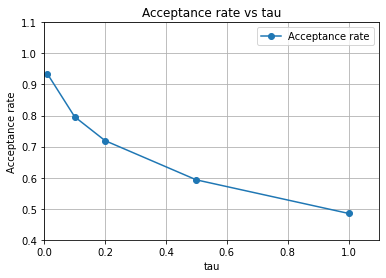

In [18]:
plt.plot([0.01, 0.1, 0.2, 0.5, 1], rate, label = 'Acceptance rate', marker = 'o')
plt.xlabel("tau")
plt.ylabel("Acceptance rate")
plt.title('Acceptance rate vs tau')
plt.grid(True)
plt.xlim((0.0, 1.10))
plt.ylim((0.4, 1.1))
plt.legend()
plt.show()

### (b) HMC

In [19]:
d = 1
mu = np.zeros(d)
M = np.eye(d)
M_inv = np.linalg.inv(M)

In [20]:
K = lambda r: 0.5 * r @ M_inv @ r

In [21]:
U = lambda z : -lp(z)

In [22]:
dU = lambda z : 2*alpha*z - a *(1-sigma(z))

In [23]:
H = lambda z, r : U(z) + K(r)

In [24]:
def Leapfrog(eps, z, r, dU = dU):
    r_half = r - eps * dU(z)/2
    z_new = z + eps * np.linalg.inv(M) @ r_half
    r_new = r_half - eps * dU(z_new)/2
    return z_new, r_new

In [25]:
def L_step_Leapfrog(z, r, eps, L = 10):
    r_ = r.copy()
    z_ = z.copy()
    for l in range(L):
        z_, r_ = Leapfrog(eps = eps, z = z_, r = r_)
    return z_ , r_

In [26]:
def HMC(z_0, r_pdf = Gaussian, L = 10, eps = 0.01, 
        n_sample = 50000, burn_in_after = 10**5, pick_every = 10):
    
    Sample_points = []
    iteration = -1
    c = -1
    sampled = 0
    z_new = z_0.copy()
    
    while sampled <= n_sample:
        iteration += 1
        r_0 = r_pdf(mu, M)
        z_new, r_new = L_step_Leapfrog(eps = eps, z = z_0, r = r_0)
        
        p = np.log(np.random.uniform())
        if p <= H(z_0, r_0) - H(z_new, -r_new):
            c += 1
            if iteration % 10000 == 0:
                print('Iteration is {}, number of accepted points is {}'.format(iteration, c))
                #print('Acceptance rate up to now:', c/iteration)
            if c >= burn_in_after:
                if sampled % 10 == 0:
                    Sample_points.append(z_new)
                    z_0 = z_new.copy()
                sampled += 1
            else:
                z_0 = z_new.copy()
                    
    return np.array(Sample_points), c/iteration

In [27]:
eps_list = [0.005, 0.01, 0.1, 0.2, 0.5]

In [28]:
t = time.time()
S, p = HMC(z_0 = np.zeros(1))
print(time.time()-t)

Iteration is 0, number of accepted points is 0
Iteration is 10000, number of accepted points is 10000
Iteration is 20000, number of accepted points is 20000
Iteration is 30000, number of accepted points is 30000
Iteration is 40000, number of accepted points is 40000
Iteration is 50000, number of accepted points is 50000
Iteration is 60000, number of accepted points is 60000
Iteration is 70000, number of accepted points is 70000
Iteration is 80000, number of accepted points is 80000
Iteration is 90000, number of accepted points is 90000
Iteration is 100000, number of accepted points is 100000
Iteration is 110000, number of accepted points is 110000
Iteration is 120000, number of accepted points is 120000
Iteration is 130000, number of accepted points is 130000
Iteration is 140000, number of accepted points is 140000
Iteration is 150000, number of accepted points is 150000
81.6766128540039


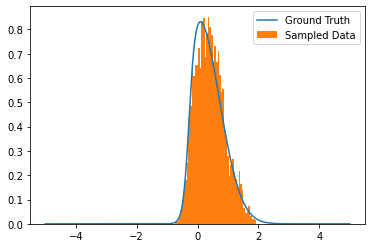

In [29]:
#plt.figure(figsize=(10,10))
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/G *np.exp(lp(x)), label = 'Ground Truth')
plt.hist(S, bins=50, density=True, label = "Sampled Data")
plt.legend()
plt.show()

Iteration is 0, number of accepted points is 0
Iteration is 10000, number of accepted points is 10000
Iteration is 20000, number of accepted points is 20000
Iteration is 30000, number of accepted points is 30000
Iteration is 40000, number of accepted points is 40000
Iteration is 50000, number of accepted points is 50000
Iteration is 60000, number of accepted points is 60000
Iteration is 70000, number of accepted points is 70000
Iteration is 80000, number of accepted points is 80000
Iteration is 90000, number of accepted points is 90000
Iteration is 100000, number of accepted points is 100000
Iteration is 110000, number of accepted points is 110000
Iteration is 120000, number of accepted points is 120000
Iteration is 130000, number of accepted points is 130000
Iteration is 140000, number of accepted points is 140000
Iteration is 150000, number of accepted points is 150000
Running time for eps = 0.005 is 81.4701817035675


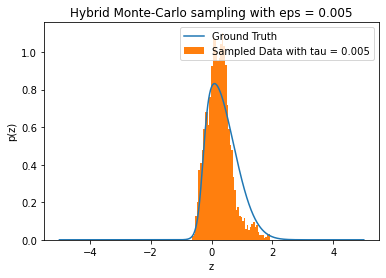

Iteration is 0, number of accepted points is 0
Iteration is 10000, number of accepted points is 10000
Iteration is 20000, number of accepted points is 20000
Iteration is 30000, number of accepted points is 29999
Iteration is 40000, number of accepted points is 39998
Iteration is 50000, number of accepted points is 49998
Iteration is 60000, number of accepted points is 59998
Iteration is 70000, number of accepted points is 69998
Iteration is 80000, number of accepted points is 79998
Iteration is 90000, number of accepted points is 89998
Iteration is 100000, number of accepted points is 99998
Iteration is 110000, number of accepted points is 109998
Iteration is 120000, number of accepted points is 119997
Iteration is 130000, number of accepted points is 129997
Iteration is 140000, number of accepted points is 139997
Iteration is 150000, number of accepted points is 149997
Running time for eps = 0.01 is 81.71395301818848


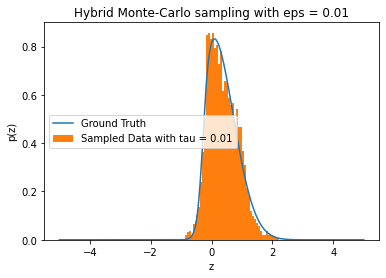

Iteration is 0, number of accepted points is 0
Iteration is 10000, number of accepted points is 9953
Iteration is 20000, number of accepted points is 19914
Iteration is 30000, number of accepted points is 29868
Iteration is 40000, number of accepted points is 39827
Iteration is 50000, number of accepted points is 49778
Iteration is 60000, number of accepted points is 59728
Iteration is 70000, number of accepted points is 69678
Iteration is 80000, number of accepted points is 79631
Iteration is 90000, number of accepted points is 89572
Iteration is 100000, number of accepted points is 99522
Iteration is 110000, number of accepted points is 109467
Iteration is 120000, number of accepted points is 119426
Iteration is 130000, number of accepted points is 129378
Iteration is 140000, number of accepted points is 139337
Iteration is 150000, number of accepted points is 149280
Running time for eps = 0.1 is 81.97840404510498


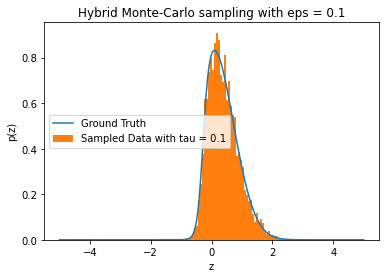

Iteration is 0, number of accepted points is 0
Iteration is 10000, number of accepted points is 9742
Iteration is 20000, number of accepted points is 19486
Iteration is 30000, number of accepted points is 29195
Iteration is 40000, number of accepted points is 38918
Iteration is 50000, number of accepted points is 48650
Iteration is 60000, number of accepted points is 58348
Iteration is 70000, number of accepted points is 68061
Iteration is 80000, number of accepted points is 77768
Iteration is 90000, number of accepted points is 87501
Iteration is 100000, number of accepted points is 97224
Iteration is 110000, number of accepted points is 106938
Iteration is 120000, number of accepted points is 116646
Iteration is 130000, number of accepted points is 126410
Iteration is 140000, number of accepted points is 136120
Iteration is 150000, number of accepted points is 145840
Running time for eps = 0.2 is 84.10471391677856


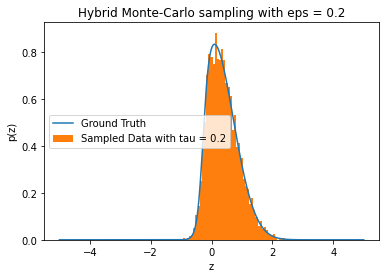

Iteration is 10000, number of accepted points is 6234
Iteration is 20000, number of accepted points is 12540
Iteration is 50000, number of accepted points is 31362
Iteration is 70000, number of accepted points is 44019
Iteration is 90000, number of accepted points is 56391
Iteration is 100000, number of accepted points is 62705
Iteration is 110000, number of accepted points is 69000
Iteration is 140000, number of accepted points is 87854
Iteration is 150000, number of accepted points is 94134
Iteration is 160000, number of accepted points is 100399
Iteration is 190000, number of accepted points is 119319
Iteration is 210000, number of accepted points is 131818
Iteration is 220000, number of accepted points is 138192
Running time for eps = 0.5 is 129.60529494285583


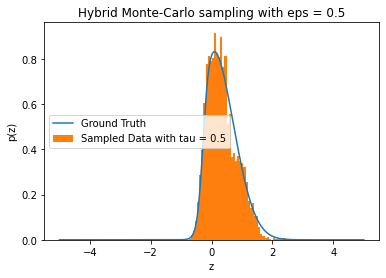

In [30]:
rate = []
x = np.linspace(-5, 5, 1000)
y = 1/G *np.exp(lp(x))
for eps in eps_list:
    t = time.time()
    S, p = HMC(z_0 = np.zeros(1), eps = eps)
    rate.append(p)
    print('Running time for eps = {} is {}'.format(eps, time.time()-t))
    
    plt.plot(x, y, label = 'Ground Truth')
    plt.hist(S, bins=50, density=True, label = "Sampled Data with tau = {}".format(eps))
    plt.title('Hybrid Monte-Carlo sampling with eps = {}'.format(eps))
    plt.xlabel("z")
    plt.ylabel("p(z)")
    plt.legend()
    plt.show()

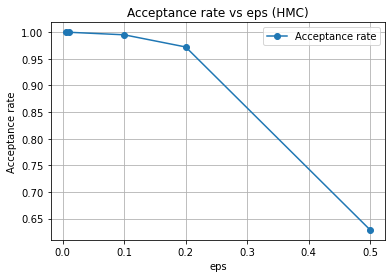

In [31]:
plt.plot(eps_list, rate, label = 'Acceptance rate', marker = 'o')
plt.xlabel("eps")
plt.ylabel("Acceptance rate")
plt.title('Acceptance rate vs eps (HMC)')
plt.grid(True)
#plt.xlim((0.0, 1.0))
#plt.ylim((0.0, 1.0))
plt.legend()
plt.show()